# Perkenalan

***MileStone 2 Phase 2***

by. Haikal Ramadhan Usman

Tujuan analisis ini adalah untuk mengklasifikasikan jenis-jenis Dry beans. Karakteristik setiap jenis Dry Beans telah tersedia melalui Dataset yang dapat diunduh di https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset. 

Jenis-jenis Dry Beans tersebut terbagi dalam 7 jenis yaitu Seker, Barbunya, Bombay, Cali, Dermosan, Horoz dan Sira, dengan mempertimbangkan ciri-ciri seperti bentuk, tipe, dan struktur menurut situasi di pasaran.

# Import Library

Import seluruh library yang akan dipakai:
* pandas: untuk loading, manipulasi dan preprocessing dataset
* numpy: untuk perhitungan numerik
* seaborn: untuk memvisualisasikan data
* matplotlib: digunakan untuk memvisualisasikan data
* train_test_split : Untuk membagi data menjadi data train dan data test
* GridSearchCV : untuk melakukan hyperparametertuning
* KFold : melakukan cross validation
* MinMaxScaler : Untuk scaling data
* StandardScaler : Untuk scaling data
* Pipeline : membuat pipeline
* Untuk perhitungan metrics menggunakan : confusion_matrix, classification_report, accuracy_score, multilabel_confusion_matrix 
* untuk model machine learning menggunakan: DecisionTreeClassifier, SVC, RandomForestClassifier

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, multilabel_confusion_matrix
from sklearn.pipeline import Pipeline

# Data Loading

In [2]:
df = pd.read_excel('/content/Dry_Bean_Dataset.xlsx')

# EDA

In [3]:
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [4]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

Tidak ada data null pada dataset ini dan ketika liat describe nya tidak ada data yang 0.

Berikut jenis-jenis kolom yang tersedia pada data tersebut:
1. Area (A): The area of a bean zone and the number of pixels within its boundaries.
2. Perimeter (P): Bean circumference is defined as the length of its border.
3. Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
4. Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5. Aspect ratio (K): Defines the relationship between L and l.
6. Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
7. Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8. Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
9. Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
10. Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11. Roundness (R): Calculated with the following formula: (4piA)/(P^2).
12. Compactness (CO): Measures the roundness of an object: Ed/L.
13. ShapeFactor1 (SF1)
14. ShapeFactor2 (SF2)
15. ShapeFactor3 (SF3)
16. ShapeFactor4 (SF4)
17. Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira).

In [6]:
df['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

Ada 7 kelas yang tersedia yaitu 'SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'

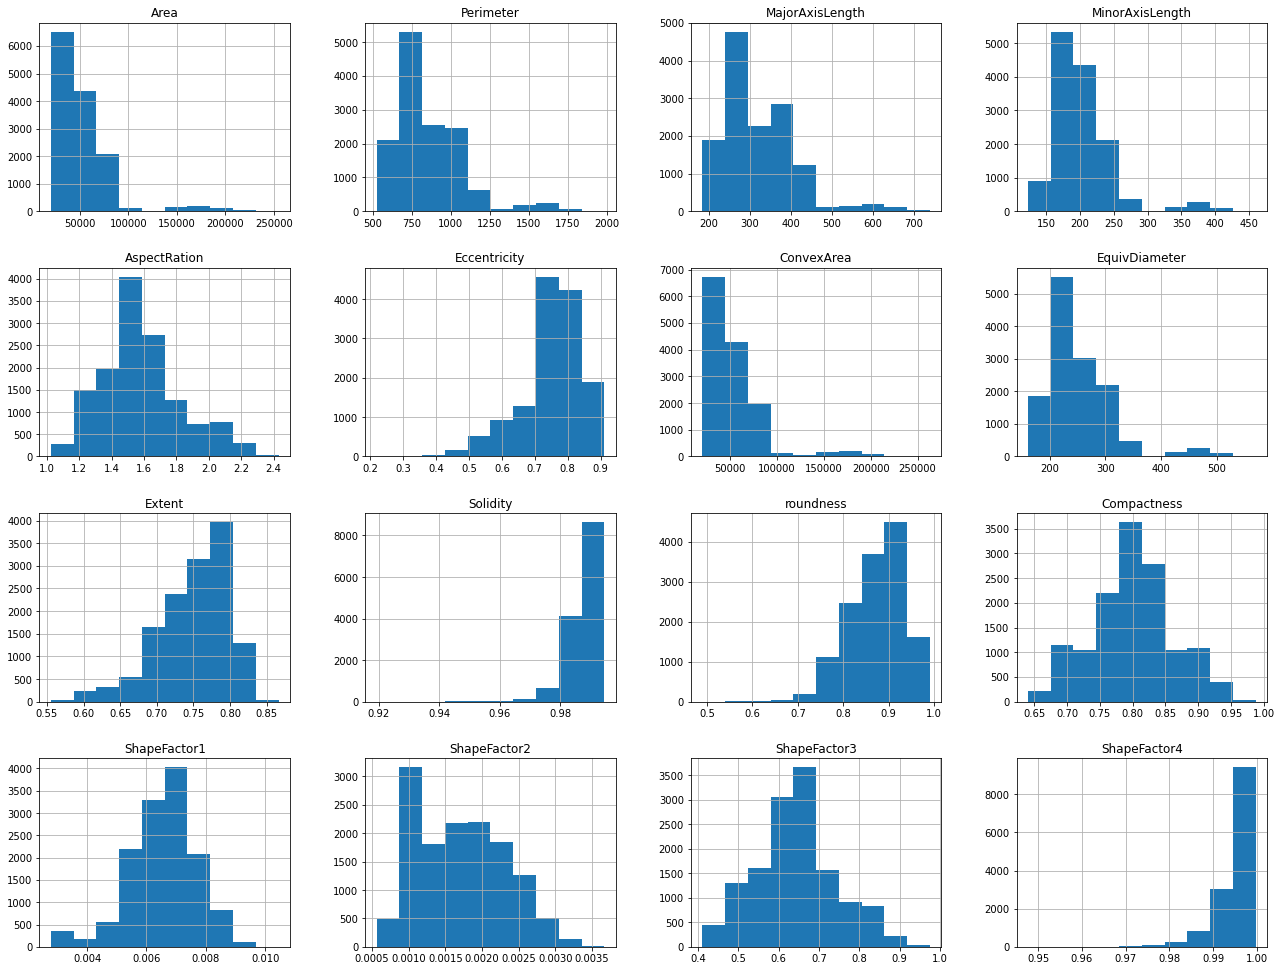

In [7]:
df.hist( figsize=(22, 17))
plt.show()

Semuanya Continues, artinya numeric

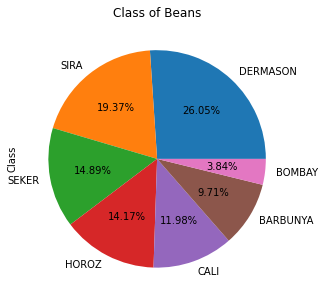

In [8]:
df.Class.value_counts().plot(kind='pie', title="Class of Beans", autopct='%1.2f%%', figsize=(5,5))
plt.show()

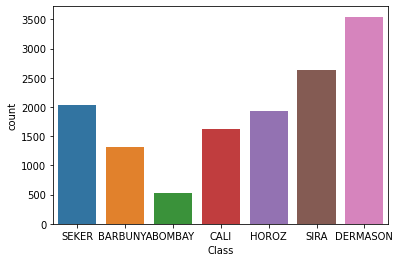

In [9]:
sns.countplot(x=df['Class'], data=df)

Bisa dilihat bahwa dari data, Class yang terbanyak adalah DERMASON dengan jumlah sekitaran 3500(26.05%) dan terendah adalah BOMBAY dengan jumlah sekitaran 500(3.84%)

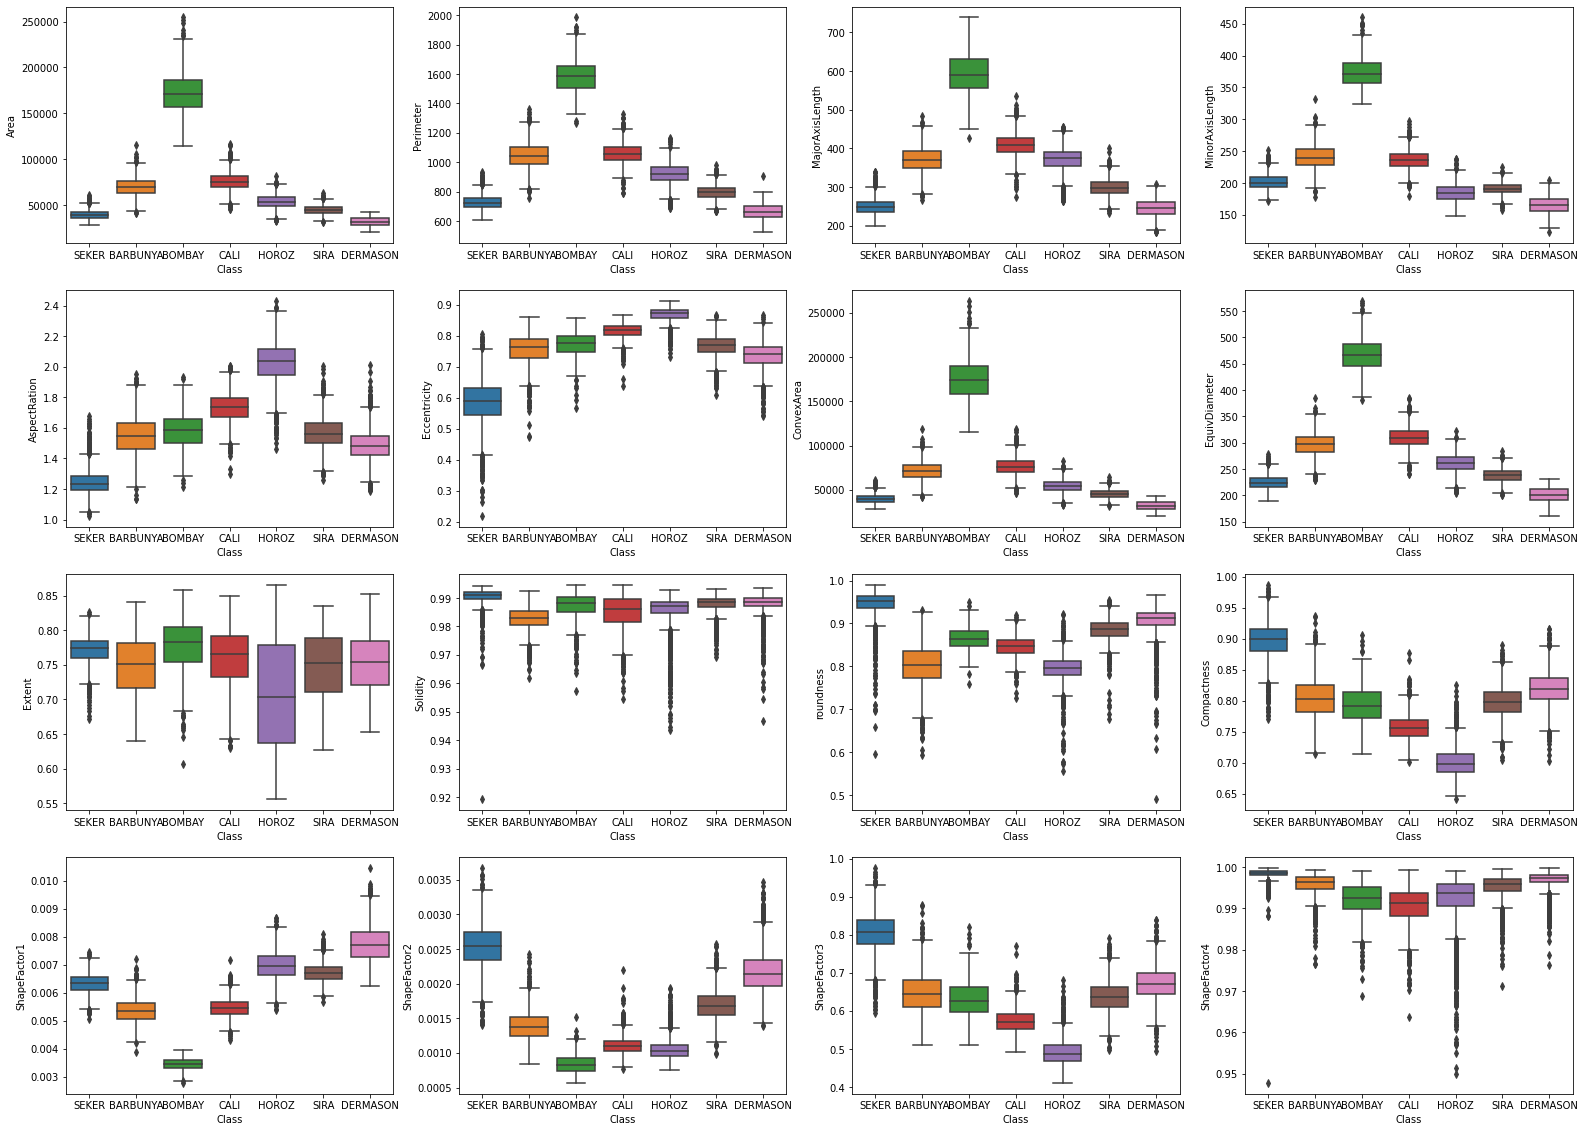

In [10]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(27,20))
sns.boxplot(x='Class', y='Area', data=df, ax=ax[0][0])
sns.boxplot(x='Class', y='Perimeter', data=df, ax=ax[0][1])
sns.boxplot(x='Class', y='MajorAxisLength', data=df, ax=ax[0][2])
sns.boxplot(x='Class', y='MinorAxisLength', data=df, ax=ax[0][3])

sns.boxplot(x='Class', y='AspectRation', data=df, ax=ax[1][0])
sns.boxplot(x='Class', y='Eccentricity', data=df, ax=ax[1][1])
sns.boxplot(x='Class', y='ConvexArea', data=df, ax=ax[1][2])
sns.boxplot(x='Class', y='EquivDiameter', data=df, ax=ax[1][3])

sns.boxplot(x='Class', y='Extent', data=df, ax=ax[2][0])
sns.boxplot(x='Class', y='Solidity', data=df, ax=ax[2][1])
sns.boxplot(x='Class', y='roundness', data=df, ax=ax[2][2])
sns.boxplot(x='Class', y='Compactness', data=df, ax=ax[2][3])

sns.boxplot(x='Class', y='ShapeFactor1', data=df, ax=ax[3][0])
sns.boxplot(x='Class', y='ShapeFactor2', data=df, ax=ax[3][1])
sns.boxplot(x='Class', y='ShapeFactor3', data=df, ax=ax[3][2])
sns.boxplot(x='Class', y='ShapeFactor4', data=df, ax=ax[3][3])
plt.show()

Melihat hasil plot dari boxplot Area, Perimeter, MajorAxisLength, MinorAxisLength, ConvexArea dan EquivDiameter, nilai minimum dan juga Q1 dari class BOMBAY berada datas dati nilai max class yang lainnya, jadi bisa disimpulkan ukuran dari dry beans jenis BOMBAY lebih besar dari pada yang lainnya

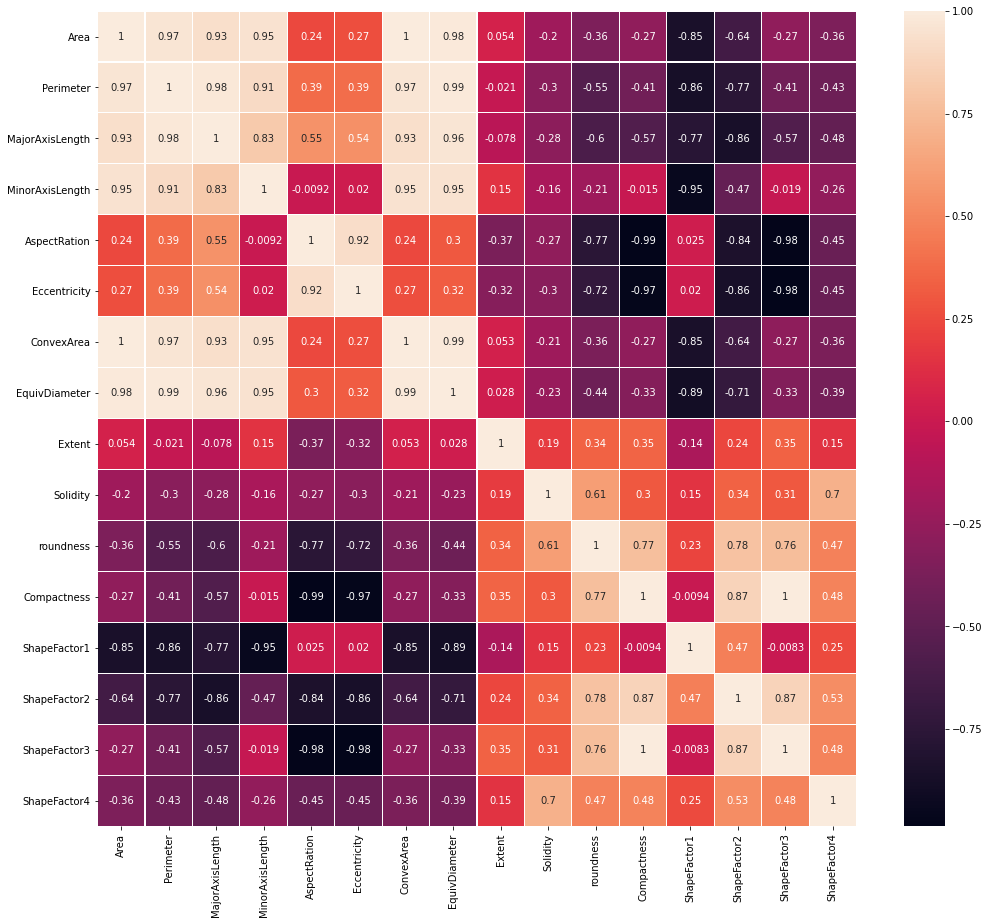

In [11]:
fig, ax = plt.subplots(figsize=(17,15))
sns.heatmap(df.corr(), annot=True, linewidths=.05, ax=ax)
plt.show()

1. Area dan Perimeter mempunyai korelasi positif yang kuat, tapi karena kedua feature sangat penting untuk mendeteksi Class, maka saya akan tetap memakai keduanya sebagai feature. 
2. MajorAxisLength dan MinorAxisLength korelasi nya positif sangat kuat, tapi karena ada AspectRatio yang meghubungkan keduanya, maka saya akan menyingkirkan keduanya. 
3. Eccentricity karena memiliki korelasi kuat dengan AspectRatio maka akan saya singkirkan.
4. ConvexArea dan EquivDiameter karena memilik korelasi dengan Area dan Perimeter maka akan saya singkirkan juga.
5. Compactness karena memiliki korelasi dengan roundness, ShapeFactor2 dan ShapeFactor3 maka akan disingkirkan.
6. ShapeFactor2 dan ShapeFactor3 akan saya hilangkan karena saling berkorelasi dan juga memiliki korelasi kuat dengan AspectRatio dan roundness

# Data Preprocessing

## Feature Selection

In [12]:
X = df.drop(columns=['MajorAxisLength', 'MinorAxisLength', 'Eccentricity','ConvexArea','EquivDiameter','Compactness','ShapeFactor2','ShapeFactor3','Class'])
y = df.Class

In [13]:
X

,Area,Perimeter,AspectRation,Extent,Solidity,roundness,ShapeFactor1,ShapeFactor4
0,28395,610.291,1.197191,0.763923,0.988856,0.958027,0.007332,0.998724
1,28734,638.018,1.097356,0.783968,0.984986,0.887034,0.006979,0.998430
2,29380,624.110,1.209713,0.778113,0.989559,0.947849,0.007244,0.999066
3,30008,645.884,1.153638,0.782681,0.976696,0.903936,0.007017,0.994199
4,30140,620.134,1.060798,0.773098,0.990893,0.984877,0.006697,0.999166
...,...,...,...,...,...,...,...,...
13606,42097,759.696,1.552728,0.714574,0.990331,0.916603,0.006858,0.998385
13607,42101,757.499,1.476439,0.799943,0.990752,0.922015,0.006688,0.998219
13608,42139,759.321,1.472582,0.729932,0.989899,0.918424,0.006681,0.996767
13609,42147,763.779,1.489326,0.705389,0.987813,0.907906,0.006724,0.995222


In [14]:
y

0           SEKER
1           SEKER
2           SEKER
3           SEKER
4           SEKER
           ...   
13606    DERMASON
13607    DERMASON
13608    DERMASON
13609    DERMASON
13610    DERMASON
Name: Class, Length: 13611, dtype: object

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [16]:
scaler=MinMaxScaler()
XtrainScaled=scaler.fit_transform(xtrain)

# Model Definition

Untuk pertama saya akan mencoba menggunakan DecisionTreeClassifier.

In [17]:
dt = DecisionTreeClassifier(class_weight='balanced')

# Model Training

In [18]:
dt.fit(XtrainScaled, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Model Evaluation

In [19]:
ypred = dt.predict(scaler.transform(xtest))

In [20]:
print(classification_report(ypred,ytest))
print(accuracy_score(ypred, ytest))

              precision    recall  f1-score   support

    BARBUNYA       0.88      0.90      0.89       260
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.89      0.90      0.89       322
    DERMASON       0.88      0.89      0.88       702
       HOROZ       0.93      0.93      0.93       385
       SEKER       0.95      0.93      0.94       413
        SIRA       0.82      0.81      0.82       537

    accuracy                           0.89      2723
   macro avg       0.91      0.91      0.91      2723
weighted avg       0.89      0.89      0.89      2723

0.8916636063165626


Dari hasil precision, recall dan f1-score, model ini cukup bagus dengan nilai diatas 0.80 ditambah dengan akurasi nya yang mencapai 0.88

In [21]:
print(multilabel_confusion_matrix(ypred, ytest))

[[[2432   31]
  [  26  234]]

 [[2619    0]
  [   0  104]]

 [[2364   37]
  [  33  289]]

 [[1936   85]
  [  78  624]]

 [[2310   28]
  [  27  358]]

 [[2289   21]
  [  28  385]]

 [[2093   93]
  [ 103  434]]]


Dari Confusion matrix diatas, model ini lebih bisa memprediksi jenis BOMBAY daripada jenis lainnya dengan melihat jumlah False Positive dan False Negative nya yang 0. Model ini lebih bisa memprediksi jenis yang paling sedikit muncul di dataset. Namun, bukan berarti model ini lebih susah memprediksi jenis yang paling banyak di dataset karena dari hasil diatas model ini lebih susah memprediksi jenis SIRA.

Jika melihat kembali bagian EDA, kita tahu bahwa BOMBAY memiliki karakteristik berbeda dari yang lainnya yaitu ukurannya lebih besar dari yang lainnya. Pada bagian boxplot terlihat nilai minimum (Area dan Perimeter) BOMBAY berada diatas nilai maximum dari jenis-jenis Class yang lainnya. Karena karakter yang berbeda inilah BOMBAY sangat mudah diklasifikasikan. Bahkan jika dilihat precision, recall dan f1-score bernilai 1.00

# Menggunakan Pipeline, GridSearchCV dan Cross Validation

Selanjutnya saya akan menggunakan Pipeline, GridSearchCV dan Cross Validation untuk mencari model dan parameter yang terbaik lalu membandingkannya dengan model Decission Tree diatas

Define Pipeline dengan default modelnya SVC:

In [22]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

Define model dan parameternya. Ada tiga model yang akan saya bandingkan. Pertama SVC dengan membandingkan setiap kernelnya. Kedua RandomForestClassifier dengan membandingkan tiap n_estimators dan max_features. Terakhir ada DecisionTreeClassifier dengan membandingkan tiap max_depth.

In [23]:
param = [
         {'classifier':[SVC(C=0.1, class_weight='balanced')], 
          'preprocessing':[StandardScaler()],
          'classifier__kernel':['linear','poly','rbf']},
         {'classifier':[RandomForestClassifier(class_weight='balanced')], 
          'preprocessing':[StandardScaler()],
          'classifier__n_estimators':[50,100,150,200],
          'classifier__max_features': [1, 2, 3]},
         {'classifier':[DecisionTreeClassifier(class_weight='balanced')], 
          'preprocessing':[StandardScaler()],
          'classifier__max_depth':[5,10,15,20,25]}
]

In [24]:
kFold=KFold(n_splits=5)

In [25]:
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
grid = GridSearchCV(pipe, param, cv=kFold)
grid.fit(Xtr, ytr)
print('Best Estimator: ', grid.best_estimator_)

Best Estimator:  Pipeline(memory=None,
         steps=[('preprocessing',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight='balanced',
                                        criterion='gini', max_depth=None,
                                        max_features=1, max_leaf_nodes=None,
                                        max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=200, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbo

In [31]:
grid

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessing',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('classifier',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_ite...
                                                                min_impurity_decrease=0.0,
                             

Hasilnya RandomForestClassifier adalah yang terbaik dengan n_estimators=200 dan max_features=1

In [27]:
best=grid.best_estimator_
ypred=best.predict(Xts)
print(confusion_matrix(ypred, yts))
print(classification_report(ypred, yts))

[[230   0   3   0   1   0   2]
 [  0  92   0   0   0   0   0]
 [ 13   0 338   0   4   0   0]
 [  0   0   0 683   2   2  55]
 [  2   0   6   1 373   0   7]
 [  2   0   1  13   0 359   3]
 [  8   0   2  38  10  15 458]]
              precision    recall  f1-score   support

    BARBUNYA       0.90      0.97      0.94       236
      BOMBAY       1.00      1.00      1.00        92
        CALI       0.97      0.95      0.96       355
    DERMASON       0.93      0.92      0.92       742
       HOROZ       0.96      0.96      0.96       389
       SEKER       0.95      0.95      0.95       378
        SIRA       0.87      0.86      0.87       531

    accuracy                           0.93      2723
   macro avg       0.94      0.95      0.94      2723
weighted avg       0.93      0.93      0.93      2723



Bisa dilihat bahwa nilai precision, recall, dan f1-score disini lebih baik dibanding dengan model decision tree yang sudah dicoba diatas. Akurasi nya juga lebih baik yaitu 0.93.

In [28]:
print(multilabel_confusion_matrix(ypred, yts))

[[[2462   25]
  [   6  230]]

 [[2631    0]
  [   0   92]]

 [[2356   12]
  [  17  338]]

 [[1929   52]
  [  59  683]]

 [[2317   17]
  [  16  373]]

 [[2328   17]
  [  19  359]]

 [[2125   67]
  [  73  458]]]


Bisa dilihat bahwa nilai False Negative dan False Positive lebih baik daripada model decision tree yang sudah kita coba tadi. Kemudian kita juga bisa lihat bahwa model ini sangat mudah memprediksi jenis BOMBAY dari pada jenis yang lainnya. Seperti yang sudah saya jelaskan diatas bahwa BOMBAY mudah diklasifikasikan karena BOMBAY memiliki Area dan Perimeter yang lebih besar daripada yang lainnya.

# Model Inference

Membuat data baru lalu memprediksi data baru tersebut

In [29]:
new=X.sample(30)
new

,Area,Perimeter,AspectRation,Extent,Solidity,roundness,ShapeFactor1,ShapeFactor4
4905,77787,1082.712,1.600041,0.751638,0.981069,0.833856,0.005137,0.992579
7616,38139,742.711,1.530895,0.741802,0.985351,0.868839,0.007170,0.994025
8573,43787,793.258,1.705581,0.790579,0.989268,0.874432,0.007056,0.996107
10656,27287,609.595,1.460730,0.781459,0.988946,0.922747,0.008261,0.998868
6509,54160,929.492,1.722029,0.749505,0.973698,0.787766,0.006452,0.972379
5962,48650,890.440,2.229934,0.586922,0.986795,0.771052,0.007666,0.993166
4202,68256,1015.699,1.782785,0.797570,0.983317,0.831420,0.005796,0.990030
9039,45881,809.692,1.621493,0.761106,0.986985,0.879434,0.006725,0.995020
3433,150648,1489.751,1.349759,0.781426,0.984042,0.852994,0.003398,0.987841
6217,51510,889.324,1.912257,0.770692,0.987236,0.818430,0.006884,0.997347


In [30]:
cls=best.predict(new)
new['Class']=cls
new

,Area,Perimeter,AspectRation,Extent,Solidity,roundness,ShapeFactor1,ShapeFactor4,Class
4905,77787,1082.712,1.600041,0.751638,0.981069,0.833856,0.005137,0.992579,CALI
7616,38139,742.711,1.530895,0.741802,0.985351,0.868839,0.007170,0.994025,SIRA
8573,43787,793.258,1.705581,0.790579,0.989268,0.874432,0.007056,0.996107,SIRA
10656,27287,609.595,1.460730,0.781459,0.988946,0.922747,0.008261,0.998868,DERMASON
6509,54160,929.492,1.722029,0.749505,0.973698,0.787766,0.006452,0.972379,HOROZ
5962,48650,890.440,2.229934,0.586922,0.986795,0.771052,0.007666,0.993166,HOROZ
4202,68256,1015.699,1.782785,0.797570,0.983317,0.831420,0.005796,0.990030,CALI
9039,45881,809.692,1.621493,0.761106,0.986985,0.879434,0.006725,0.995020,SIRA
3433,150648,1489.751,1.349759,0.781426,0.984042,0.852994,0.003398,0.987841,BOMBAY
6217,51510,889.324,1.912257,0.770692,0.987236,0.818430,0.006884,0.997347,HOROZ


# Pengambilan Kesimpulan

EDA:
1. Distribusi setiap features bersifat continues, artinya semua features adalah numeric.
2. Class yang terbanyak adalah DERMASON dengan jumlah sekitaran 3500(26.05%) dan terendah adalah BOMBAY dengan jumlah sekitaran 500(3.84%).
3. Dari hasil boxplot, Area, Perimeter, MajorAxisLength, MinorAxisLength, ConvexArea dan EquivDiameter, nilai minimum dan juga Q1 dari class BOMBAY berada datas dati nilai max dari class yang lainnya, jadi bisa disimpulkan ukuran dari dry beans class BOMBAY lebih besar dari pada yang lainnya yang menjadi keunikan dari class BOMBAY.

Model Training dan Evaluation:
1. Nilai precision, recall, dan f1-score dari hasil pipeline dan GridSearchCV lebih baik dibanding dengan model decision tree yang sudah dicoba sebelumnya. Akurasi nya juga lebih baik yaitu 0.93.
2. Dari hasil Confusion matrix, model lebih bisa memprediksi jenis BOMBAY daripada jenis lainnya dengan melihat jumlah False Positive dan False Negative nya yang 0. 
3. Dari hasil EDA, BOMBAY adalah yang paling sedikit dibanding class yang lain. Namun, bukan berarti model ini lebih susah memprediksi jenis yang paling banyak di dataset karena dari hasil diatas model ini lebih susah memprediksi jenis SIRA.
4. Jika melihat kembali bagian EDA, kita tahu bahwa BOMBAY memiliki karakteristik unik yang berbeda dari yang lainnya yaitu ukurannya lebih besar dari yang lainnya. Pada bagian boxplot terlihat nilai minimum (Area dan Perimeter) BOMBAY berada diatas nilai maximum dari jenis-jenis Class yang lainnya. Karena karakter yang berbeda inilah BOMBAY sangat mudah diklasifikasikan. Bahkan jika dilihat precision, recall dan f1-score bernilai 1.00

Model Best Estimator sudah saya deploy ke https://drybeans.herokuapp.com/.